In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber_data = pd.read_csv("./Uber Request Data.csv")

# Initial Analysis


In [3]:
print(uber_data.shape)
print(uber_data.info())
print(uber_data.columns)


(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


## As we can see a few nulls in columns Driver id and Drop timestamp , Data cleaning is required

# Data Cleaning and Data Preparation

In [4]:
uber_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


### Conversion of  Request timestamp and Drop timestamp to datetime type

In [5]:
uber_data['Request timestamp']=uber_data['Request timestamp'].astype('datetime64')
uber_data['Drop timestamp']=uber_data['Drop timestamp'].astype('datetime64')
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [6]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
uber_data['Driver id'].describe()

count    4095.000000
mean      149.501343
std        86.051994
min         1.000000
25%        75.000000
50%       149.000000
75%       224.000000
max       300.000000
Name: Driver id, dtype: float64

In [8]:
uber_data[np.isnan(uber_data['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT
4100,6,City,NaN,No Cars Available,2016-11-07 00:36:00,NaT
4101,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4102,8,City,NaN,No Cars Available,2016-11-07 00:40:00,NaT
4103,12,City,NaN,No Cars Available,2016-11-07 01:08:00,NaT
4104,16,Airport,NaN,No Cars Available,2016-11-07 01:09:00,NaT


### Driver id has NaN value when status = No Cars available
Imputing Driver id with 0 value to remove NaN at the same time being able to differentitate with other requests which were fulfilled.

In [9]:
uber_data['Driver id']=uber_data['Driver id'].fillna(0)

In [10]:
uber_data[np.isnat(uber_data['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT
2839,80,City,3.0,Cancelled,2016-11-07 04:47:00,NaT
2840,534,City,3.0,Cancelled,2016-11-07 10:01:00,NaT


### Data Analysis
#### Creating a new collumn called Time diff to store the time taken for the whole trip  

In [11]:
uber_data['Time diff']= uber_data['Drop timestamp'] - uber_data['Request timestamp']

#### Create a new column Minutes taken to get the time taken to complete trip

In [12]:
uber_data['Minutes taken']= uber_data['Time diff'].apply(lambda x: x.seconds/60)
uber_data=uber_data.drop(['Time diff'],axis=1)

#### Create a column hours to get  the time in hours for each request to identify the hours where supply demand gap exists

In [13]:
uber_data['Hours'] = uber_data['Request timestamp'].apply(lambda x:x.hour)

#### Create a new column time of day to get the time of day based on Hours values

In [14]:
def getTimeOfDay(x):
    if x>=5 and x<8:
        tod="Early Morning"
    elif x>=8 and x<12:
        tod="Morning"
    elif x>=12 and x<16:
        tod="Afternoon"
    elif x>=16 and x<19:
        tod="Evening"
    elif x>=19 and x<23:
        tod="Night"
    else:
        tod="Late Night"
    return tod

In [15]:
uber_data['Time of Day']=uber_data['Hours'].apply(getTimeOfDay)

#### For visualisation of  the frequency of requests that get cancelled or show 'no cars available' we don't require the Status trips completed.Therefore creating a new dataframe with only Cancelled requests and  'no cars available' requests.

In [16]:
trip_incomplete=['Cancelled','No Cars Available']
uber_data_incomplete_trip=uber_data.loc[uber_data['Status'].isin(trip_incomplete)]

#### Visualizing the most problematic requests

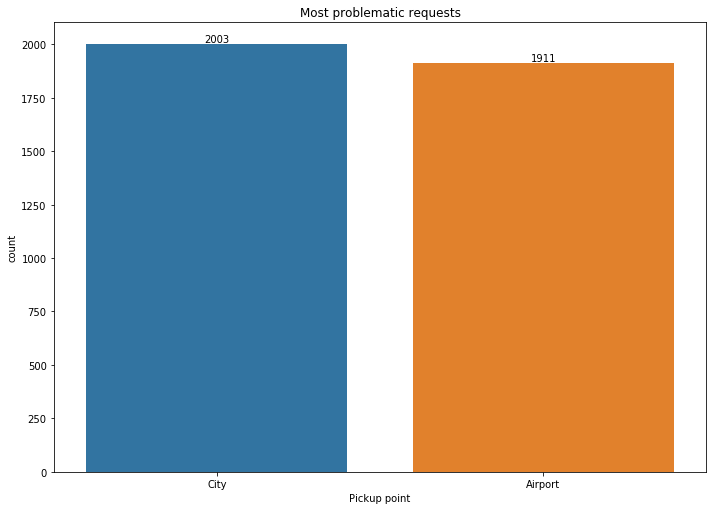

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
figure1= sns.countplot(uber_data_incomplete_trip['Pickup point'])
figure1.set_title('Most problematic requests')
for p in figure1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    figure1.annotate(int(y),(x.mean(),y),
            ha='center', va='bottom') 


#### We can observe that both requests from City to Airport and Vice Versa are problematic but trip  requests from the city  to ariport are not being completed.  

#### Visualizing count of trips from Airport to city and Vice versa and their respective status 

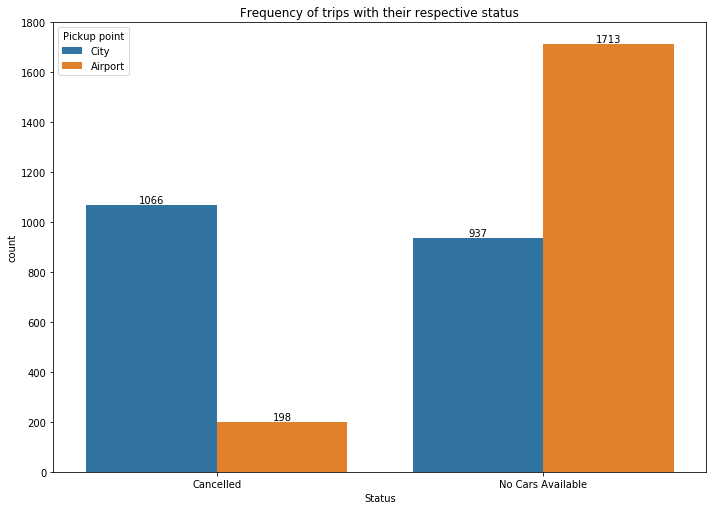

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
figure2= sns.countplot(uber_data_incomplete_trip['Status'],hue=uber_data_incomplete_trip['Pickup point'])
figure2.set_title('Frequency of trips with their respective status')
for p in figure2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    figure2.annotate((int(y)),(x.mean(),y),
            ha='center', va='bottom')


#### We can infer from the above bar plot  that the maximum cancelled trips are from the City also the maximum 'Unavailibility of cars ' is from the Airport

#### Visualizing the fequency of trips during different times of day with their respective status 

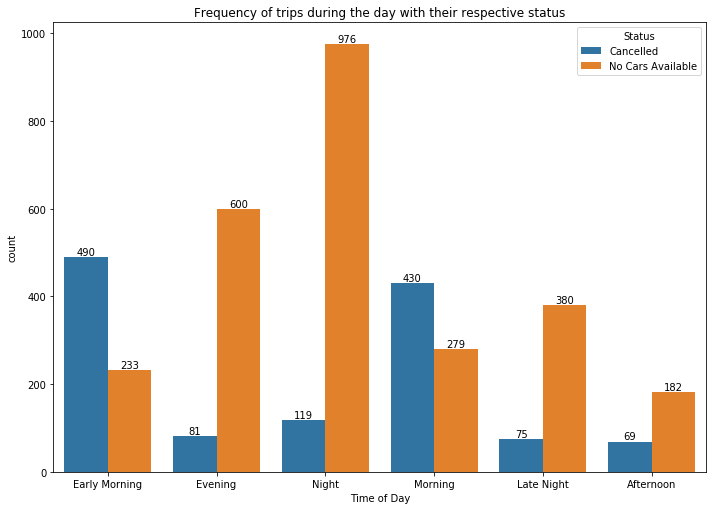

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
figure3=sns.countplot(uber_data_incomplete_trip['Time of Day'],hue=uber_data_incomplete_trip['Status'])
figure3.set_title('Frequency of trips during the day with their respective status')
for p in figure3.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    figure3.annotate(int(y),(x.mean(),y),
            ha='center', va='bottom') 


#### We can infer from the above plot trips are cancelled by drivers during  Early Morning and Morning time slots and Cars aren't available in the Night time slot

#### Visualizing both the above plots 

In [ ]:
figure=sns.catplot(x='Time of Day',y='Hours', hue='Pickup point',col='Status',kind='swarm',data=uber_data_incomplete_trip,height=2,aspect=4)
figure.fig.set_size_inches(15,15)
figure.set(yticks=range(0,23))

#### We can observe from the plot that  Most Cabs are cancelled by Cab drivers in the Early Morning and Morning timeslot when the request is from the City also we can observe Cabs aren't available in the Night time slot when the request is from the Airport 

#### Visualisation of Supply Demand Gap

In [ ]:
supply_demand_timeslots=pd.pivot_table(uber_data, 'Request id', ['Time of Day'], ['Status'],aggfunc='count')

In [ ]:
supply_demand_timeslots['Demand']=supply_demand_timeslots['Trip Completed']+supply_demand_timeslots['No Cars Available']+ supply_demand_timeslots['Cancelled']

In [ ]:
supply_demand_timeslots['Supply']=supply_demand_timeslots['Trip Completed']
supply_demand_timeslots['Supply demand gap']=supply_demand_timeslots['Demand']-supply_demand_timeslots['Supply']

In [ ]:
fig,ax1= plt.subplots()
ax1.set_title('Supply Demand Gap')
ax1.bar(supply_demand_timeslots.index,supply_demand_timeslots['Supply demand gap'])
ax1.set_xlabel("Time of Day")
ax1.set_ylabel("Number of Requests per time slot");

#### From the above plot we can conclude that the Night timeslot and Early Morning Timeslot has the maximum Supply Demand Gap

In [ ]:
time_slots=['Early Morning','Night']
uber_data_pickup_point=uber_data.loc[uber_data['Time of Day'].isin(time_slots)]

In [ ]:
supply_demand_pickuppoint=pd.pivot_table(uber_data_pickup_point, 'Request id', ['Pickup point'], ['Status'],aggfunc='count')

In [ ]:
supply_demand_pickuppoint['Supply']=supply_demand_pickuppoint['Trip Completed']
supply_demand_pickuppoint['Demand']=supply_demand_pickuppoint['Trip Completed']+supply_demand_pickuppoint['No Cars Available']+ supply_demand_pickuppoint['Cancelled']
supply_demand_pickuppoint['Supply Demand Gap'] = supply_demand_pickuppoint['Demand']-supply_demand_pickuppoint['Supply']


In [ ]:
fig,ax1= plt.subplots()
ax1.set_title('Supply Demand Gap Based on pickup point')
ax1.bar(supply_demand_pickuppoint.index,supply_demand_pickuppoint['Supply Demand Gap'])
ax1.set_xlabel("Pickup point")
ax1.set_ylabel("Number of Requests per time slot");



#### From above plot we can identify that requests from Airport to city have more Gap between supply and demand 

# Conclusion

### Therefore we can conclude the supply demand gap exists during the Morning and Night Timeslots for the requests going from the Airport to the City